<p><b>Question #1</b>
    <ol>
        <li>Download the diabetes.csv dataset and use <b>read_csv( )</b> to read it.</li>
        <li>Use <u>Decision Tree</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the depth of tree (try values between 2-8)</li>
            <li>Use 5-fold stratified cross validation in your work.</li>
            <li><b>Outcome</b> is your dependent variable</li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Decision Tree (use the best depth that you found in last step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.(How you can interpret it)</li>
        </ul>
        <li>Create three predction models using Logistic Regression, SVM, and Random Forest:</li>
        <ul>
            <li>Use 70% of data for tarining and consider 30% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for Logistic Regression model</li>
    </ol>
            

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Write your answer here (part1)
orgData = pd.read_csv("diabetes.csv")
orgData

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
# Write your answer here (part2)
X = orgData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',
            'Age']]
y = orgData[['Outcome']]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

modelName = DecisionTreeClassifier()

dt_hpGrid = {'max_depth': [2,3,4,5,6,7,8]}

dt_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

dt_grid = GridSearchCV(modelName, dt_hpGrid, cv = dt_cv, 
                    return_train_score=True, scoring='accuracy')

dt_grid.fit(X_train, y_train)

print("Selected Best Parameter: {}".format(dt_grid.best_params_))
print("Selected Best Cross Vlidation Score: {}".format(dt_grid.best_score_))


Selected Best Parameter: {'max_depth': 4}
Selected Best Cross Vlidation Score: 0.7377661169415292


In [40]:
# Write your answer here (part3)
bestModel = dt_grid.best_estimator_
yTrainHat  = bestModel.predict(X_train)
yTestHat  = bestModel.predict(X_test)
in_sample_acc = accuracy_score(y_train,yTrainHat, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)

feaImp = bestModel.feature_importances_

print("Important Feature: ", feaImp)

In-sample Accuracy:  77.95138888888889
Important Feature:  [0.03304574 0.57236263 0.0135439  0.02077932 0.         0.14433847
 0.04857059 0.16735935]


In [34]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [36]:
# Write your answer here (part4)
X = orgData[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction',
            'Age']]
y = orgData[['Outcome']]

X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y,test_size=0.3,random_state=0)

modelLog = LogisticRegression(max_iter = 400)
modelLog.fit(X_trainN, y_trainN)
yTestHatLog = modelLog.predict(X_testN)
accLog = accuracy_score(y_testN,yTestHatLog, normalize = True) * 100 

modelSVM = SVC(kernel='linear', probability = True)
modelSVM.fit(X, y)
yTestHatSVM = modelSVM.predict(X_testN)
accSVM = accuracy_score(y_testN,yTestHatSVM, normalize = True) * 100 

modelRF = RandomForestClassifier(random_state=0)
modelRF.fit(X_trainN, y_trainN)
yTestHatRF = modelRF.predict(X_testN)
accRF = accuracy_score(y_testN,yTestHatRF, normalize = True) * 100 

print("Out of Sample_Logistic_Regression: ", accLog)
print("Out of Sample_Logistic_SVM: ", accSVM)
print("Out of Sample_Logistic_Random Forest: ", accRF)

C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-36-e44031a53544>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(X_trainN, y_trainN)


Out of Sample_Logistic_Regression:  77.92207792207793
Out of Sample_Logistic_SVM:  78.78787878787878
Out of Sample_Logistic_Random Forest:  77.92207792207793


In [37]:
# Write your answer here (part5)
crLog = classification_report(y_testN,yTestHatLog)
crSVM = classification_report(y_testN,yTestHatSVM)
crRF = classification_report(y_testN,yTestHatRF)

aucLog = roc_auc_score(y_testN, modelLog.predict_proba(X_testN)[:,1]) 
aucSVM = roc_auc_score(y_testN, modelSVM.predict_proba(X_testN)[:,1]) 
aucRF = roc_auc_score(y_testN, modelRF.predict_proba(X_testN)[:,1]) 

print("Classification Report_Logistic Regression:",crLog)
print("AUC_Logistic Regression: {:.3f}".format(aucLog))

print("Classification Report for SVM:",crSVM)
print("AUC for SVM: {:.3f}".format(aucSVM))

print("Classification Report for Random Forest:",crRF)
print("AUC for Random Forest: {:.3f}".format(aucRF))

Classification Report_Logistic Regression:               precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

AUC_Logistic Regression: 0.835
Classification Report for SVM:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.73      0.54      0.62        74

    accuracy                           0.79       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.79      0.78       231

AUC for SVM: 0.845
Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy     

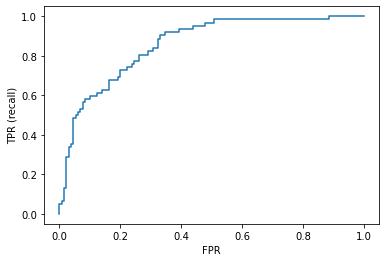

In [39]:
# Write your answer here (part6)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, modelLog.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)");

<p><b>Question #2</b>: Consider the following dataset 

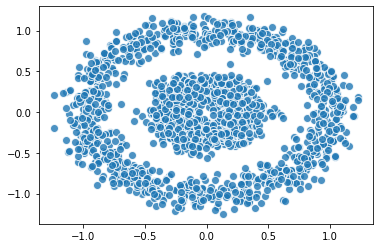

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
N_samples = 2000
X = np.array(datasets.make_circles(n_samples=N_samples,
                                   noise=0.1, factor=0.3)[0])    
plt.scatter(X[:,0], X[:,1], alpha=0.8, s=64, edgecolors='white');

<ol>
    <li>Use K-Means to cluster the points and visualize your result</li>
    <li>Use Spectral Clustering to cluster the points and visualize your result</li>
    <li>Use Agglomerative Clustering to cluster the points and visualize your result</li>
    <li>Use DBSCAN to cluster the points and visualize your result</li>
    <li>(optional) Use HDBSCAN to cluster the points and visualize your result</li>
</ol>

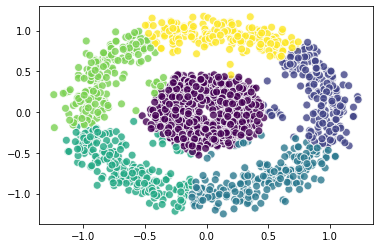

In [78]:
# Write your answer here (part1)
from sklearn.cluster import KMeans 

kmeansMod = KMeans(n_clusters=6, random_state=0) 

kmeansMod.fit(X)                            

yKmeans = kmeansMod.predict(X)             

plt.scatter(X[:,0], X[:,1], c=yKmeans,alpha=0.8, s=64, edgecolors='white');

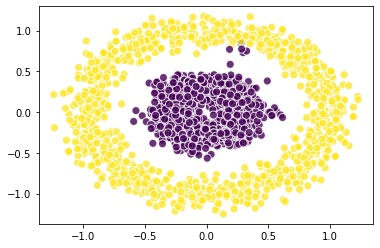

In [82]:
# Write your answer here (part2)
from sklearn.cluster import SpectralClustering 
modelSC = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans',
                           n_neighbors = 6)
labels = modelSC.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,alpha=0.8, s=64,edgecolors='white');

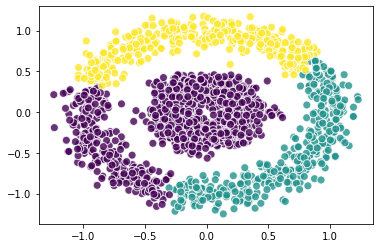

In [83]:
# Write your answer here (part3)
from sklearn.cluster import AgglomerativeClustering

modelAgg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

y_Agg = modelAgg.fit_predict(X)                

plt.scatter(X[:, 0], X[:, 1], c=y_Agg,alpha=0.8, s=64,edgecolors='white');

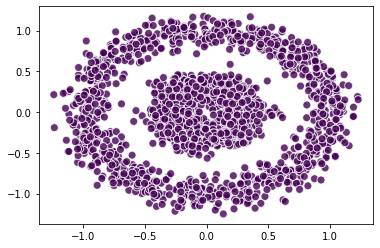

In [85]:
# Write your answer here (part4)
from sklearn.cluster import DBSCAN

modelDB = DBSCAN(min_samples=3, eps=1)
y_DB = modelDB.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_DB,alpha=0.8, s=64,edgecolors='white');

In [6]:
# Write your answer here (part5)

<p><b>Question #3</b>: Consider the following image (<u>Download the Netherlands.jpg file from Canvas</u>)

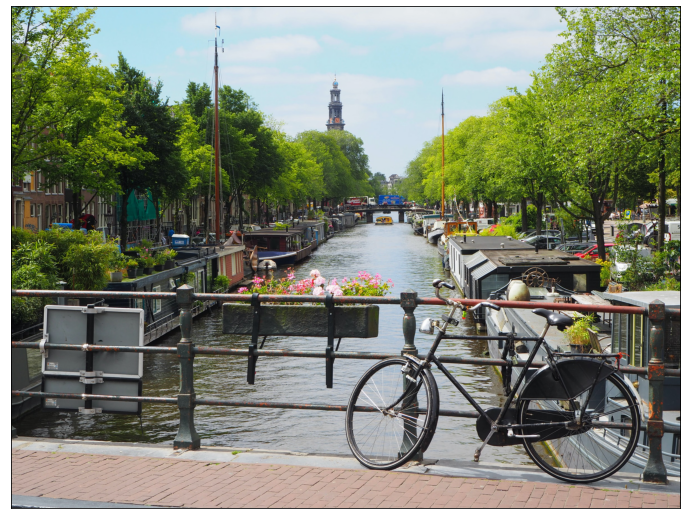

In [21]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 18))
Netherlands = np.array(mpimg.imread('Netherlands.jpg'))
ax.imshow(Netherlands)
ax.set(xticks=[], yticks=[]);

<ol>
    <li>Reduce the number of colors to 64 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 16 and visualize the image (use K-Means)</li>
    <li>Reduce the number of colors to 8 and visualize the image (use K-Means)</li>
</ol>

In [22]:
Netherlands.shape

(1799, 2400, 3)

C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


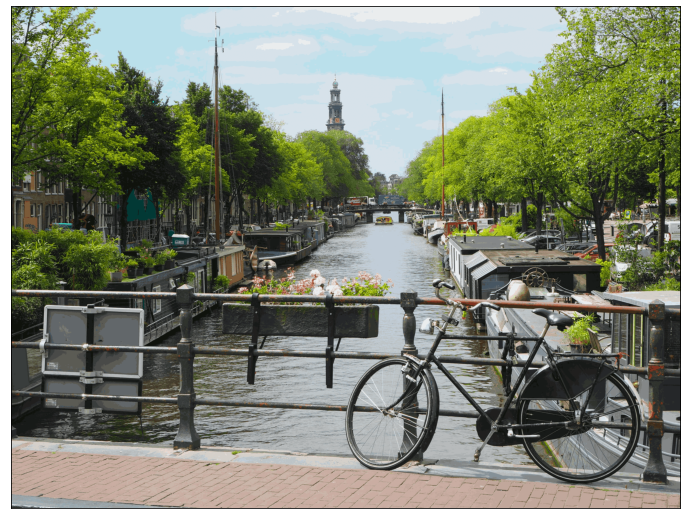

In [28]:
# Write your answer here (part1)
data = Netherlands / 255.0 # use 0...1 scale 
X = data.reshape(1799*2400, 3)
X.shape

from sklearn.cluster import MiniBatchKMeans 
kmeans_model64 = MiniBatchKMeans(64)
kmeans_model64.fit(X)
kmeans_model64.cluster_centers_
y_kmeans64 = kmeans_model64.predict(X)
# Now let's replace colors with center point of each cluster
new_colors64 = kmeans_model64.cluster_centers_[kmeans_model64.predict(X)]
new_colors64.shape
Netherlands_recolored64 = new_colors64.reshape(Netherlands.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(Netherlands_recolored64)
ax.set(xticks=[], yticks=[]);

C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


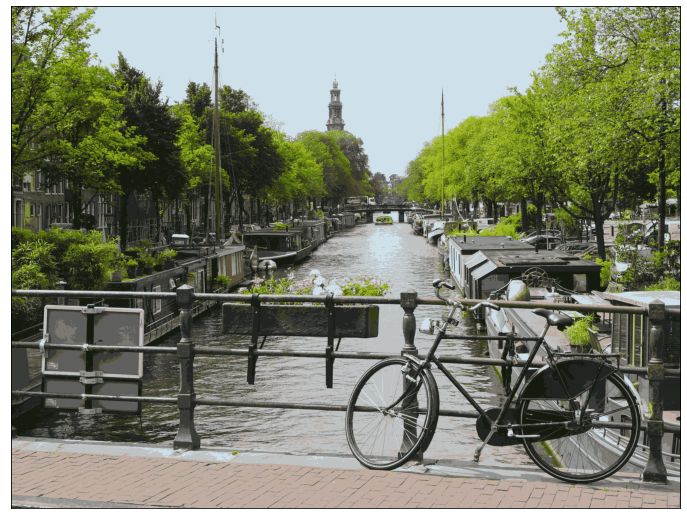

In [29]:
# Write your answer here (part2)
from sklearn.cluster import MiniBatchKMeans 
kmeans_model16 = MiniBatchKMeans(16)
kmeans_model16.fit(X)
kmeans_model16.cluster_centers_
y_kmeans16 = kmeans_model16.predict(X)
# Now let's replace colors with center point of each cluster
new_colors16 = kmeans_model16.cluster_centers_[kmeans_model16.predict(X)]
new_colors16.shape
Netherlands_recolored16 = new_colors16.reshape(Netherlands.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(Netherlands_recolored16)
ax.set(xticks=[], yticks=[]);

C:\Users\Suzzane\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


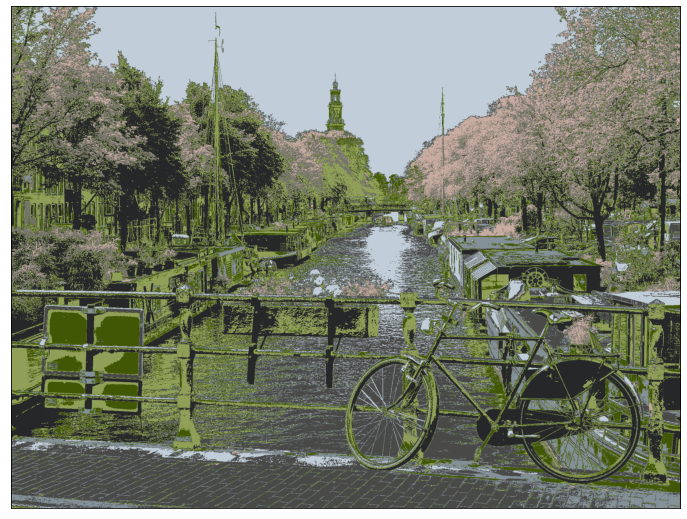

In [30]:
# Write your answer here (part3)
    
kmeans_model8 = MiniBatchKMeans(8)
kmeans_model8.fit(X)
kmeans_model8.cluster_centers_
y_kmeans8 = kmeans_model8.predict(X)
# Now let's replace colors with center point of each cluster
new_colors8 = kmeans_model64.cluster_centers_[kmeans_model8.predict(X)]
new_colors8.shape
Netherlands_recolored8 = new_colors8.reshape(Netherlands.shape)
fig, ax = plt.subplots(figsize=(12, 18))
ax.imshow(Netherlands_recolored8)
ax.set(xticks=[], yticks=[]);

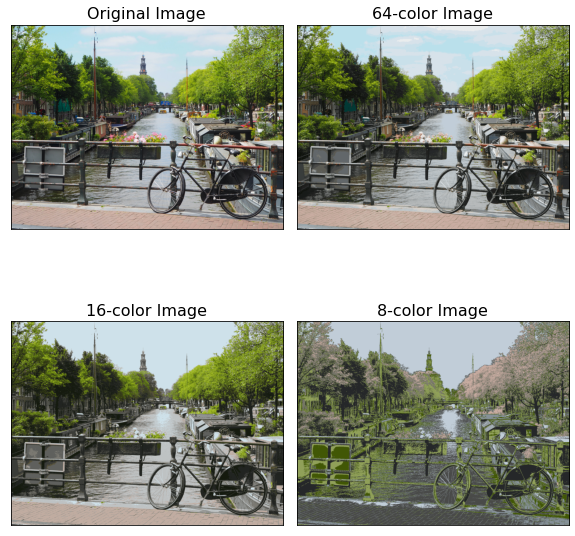

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0,0].imshow(Netherlands)
ax[0,0].set_title('Original Image', size=16)
ax[0,1].imshow(Netherlands_recolored64)
ax[0,1].set_title('64-color Image', size=16);
ax[1,0].imshow(Netherlands_recolored16)
ax[1,0].set_title('16-color Image', size=16);
ax[1,1].imshow(Netherlands_recolored8)
ax[1,1].set_title('8-color Image', size=16);

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Canvas</u>)

In [129]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGBA'))
    return img

FIFA21 = pd.read_csv("Fifa21/data.csv", low_memory=False)
TOP_200_Players = FIFA21.sort_values(by = ['Overall'], ascending=False)[:200].reset_index()
images =np.array([read_image(url) for url in TOP_200_Players.Photo])
player_names = np.array([Name for Name in TOP_200_Players.Name])
data = np.array([image.reshape(120*120*4) for image in images])

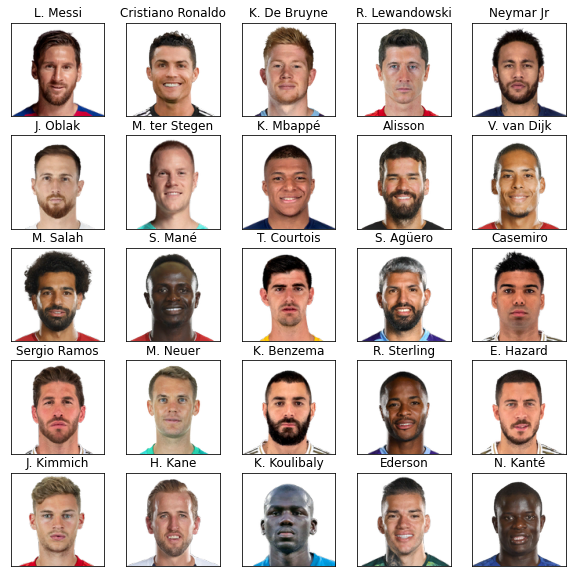

In [130]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i]) 
    axi.set_title(player_names[i]) 
    axi.set(xticks=[], yticks=[])

Here is some description about data
<ul>
    <li>images: contains 200 images of players. images.shape = (200, 120, 120, 4)</li> 
    <li>player_names: contains 200 names of players. player_names.shape = (200,)</li>
    <li>data: contains flatten version of images. data.shape = (200, 57600)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 200.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part you have two options: (1) use inverse_transform() function in pca and change back the number of dimensions in cluster centers to 57600 - read more <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html'>here</a> ,(2) for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [137]:
# Write your answer here (part1)
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
pca = PCA(n_components=200, whiten=True, random_state=0) 
X = pca.fit_transform(data)

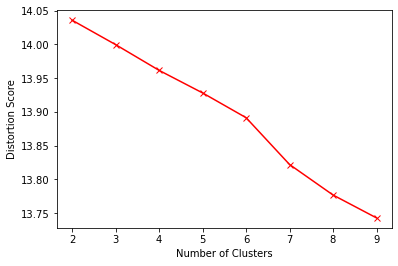

In [138]:
# Write your answer here (part2)
from scipy.spatial.distance import cdist

distortions = []
n_clusters = range(2,10)
for k in n_clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1))/X.shape[0])
# Plot the elbow
plt.plot(n_clusters, distortions, 'rx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion Score');

In [139]:
# Write your answer here (part3)
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters = range(2,10)
for k in n_clusters:
    # Create the model with different number of clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X)
    yKmeans = kmeans_model.predict(X)
    
    silhouette_avg = silhouette_score(X, yKmeans)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 9.527357331778351e-17
For n_clusters = 3 The average silhouette_score is : 1.7273900209018686e-16
For n_clusters = 4 The average silhouette_score is : -1.7808144545380087e-17
For n_clusters = 5 The average silhouette_score is : -3.650669631802915e-17
For n_clusters = 6 The average silhouette_score is : -7.390379986332735e-17
For n_clusters = 7 The average silhouette_score is : -7.657502154513439e-17
For n_clusters = 8 The average silhouette_score is : -6.321891313609929e-17
For n_clusters = 9 The average silhouette_score is : -8.54790938178244e-17


In [143]:
# Write your answer here (part4)
kmeans_model1 = KMeans(n_clusters=6, random_state=0).fit(X)
yKmeans1 = kmeans_model1.fit_predict(X)
print("Cluster sizes k-means: {}".format(np.bincount(yKmeans1)))

Cluster sizes k-means: [85 53 10 22 24  6]


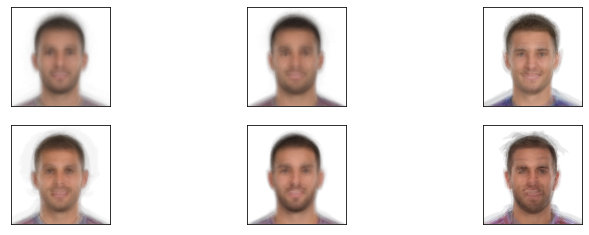

In [144]:
# Write your answer here (part5)
fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for center, ax in zip(kmeans_model1.cluster_centers_, axes.ravel()): 
    ax.imshow(pca.inverse_transform(center).reshape(images[0].shape).astype(np.uint8))

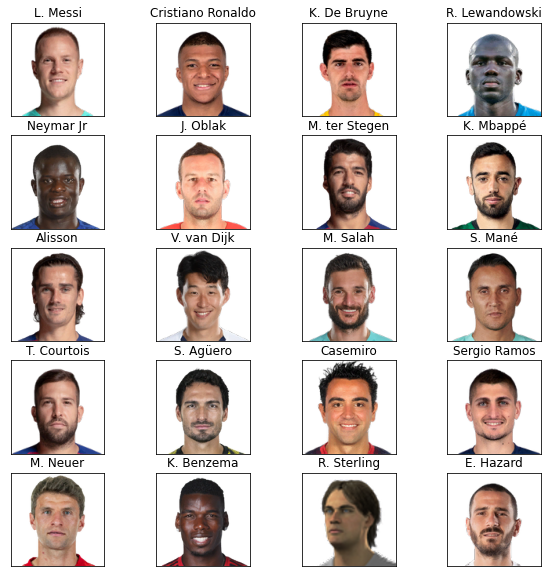

In [145]:
# Write your answer here (part6)
mask = (yKmeans1 == 1)
cluster_img = images[mask]
fig, ax = plt.subplots(5, 4, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(cluster_img[i].astype(np.uint8))
    axi.set_title(player_names[i]) 
    axi.set(xticks=[], yticks=[])